In [0]:
#UPLOAD TRAINSMALL.ZIP AND UNZIP THE DATASET. UNCOMMENT THE CODE BELOW.

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
!unzip -q trainsmall.zip

In [0]:
#GDRIVEPATH='/content/drive/My Drive/ROOT/Work/UoN/CSY3025/dogs-vs-cats/'
GDRIVEPATH=''

In [0]:
import os, shutil

base_dir = GDRIVEPATH+'trainsmall'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary') #class inferred from sub-directory structure alphanumerically. if 'binary' then 0,1. also can be 'categorical', etc.

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

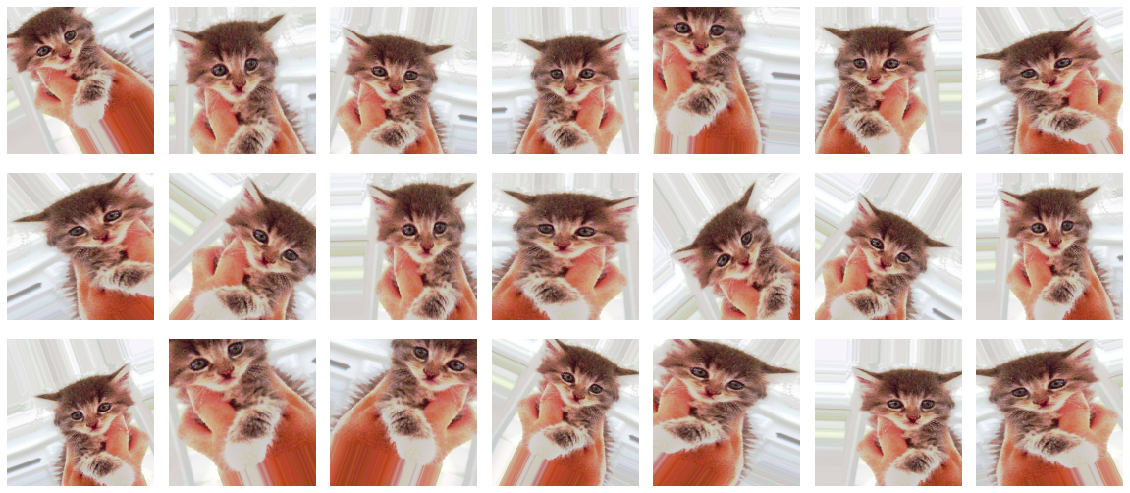

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

#take one image
img_path = fnames[3]

#load image and resize
img = image.load_img(img_path, target_size=(150, 150))

#Converts it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
#Reshapes it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

#Generates batches of randomly transformed images.
i = 0
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for batch in datagen.flow(x, batch_size=1):
    ax = fig.add_subplot(5, 7, i+1)
    ax.axis('off')
    ax.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 21 == 0:
        break
#plt.show()

In [0]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 22s 216ms/step - loss: 0.6909 - acc: 0.5234 - val_loss: 0.6643 - val_acc: 0.6060
Epoch 2/100
100/100 [==============================] - 19s 194ms/step - loss: 0.6774 - acc: 0.5688 - val_loss: 0.7140 - val_acc: 0.5573
Epoch 3/100
100/100 [==============================] - 19s 194ms/step - loss: 0.6651 - acc: 0.5893 - val_loss: 0.6269 - val_acc: 0.6142
Epoch 4/100
100/100 [==============================] - 19s 195ms/step - loss: 0.6520 - acc: 0.6143 - val_loss: 0.6279 - val_acc: 0.6411
Epoch 5/100
100/100 [==============================] - 19s 193ms/step - loss: 0.6342 - acc: 0.6313 - val_loss: 0.6168 - val_acc: 0.6694
Epoch 6/100
100/100 [==============================] - 21s 212ms/step - loss: 0.6148 - acc: 0.6508 - val_loss: 0.5394 - val_acc: 0.6637
Epoch 7/100
100/100 [==============================] - 19s 193ms/step - loss: 0.6000 - acc: 0.6739 -

In [0]:
model.save(GDRIVEPATH+'cats_and_dogs_small_2.h5')

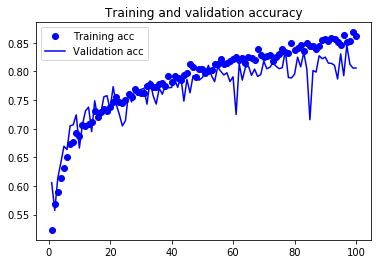

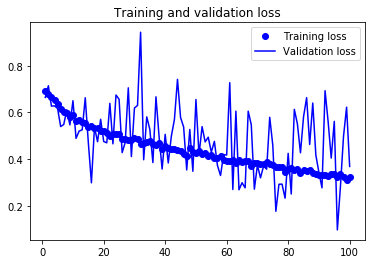

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()